In [6]:
import keras
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import cv2

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(28, activation='sigmoid'))

In [8]:
#pre_processing of training data
train_dir="asl_train_data"
test_dir="asl_alphabet_test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20)

validation_generator = test_datagen.flow_from_directory(
        test_dir,target_size=(150, 150),
        batch_size=20)


Found 84000 images belonging to 28 classes.
Found 28 images belonging to 28 classes.


In [9]:
label_map = (validation_generator.class_indices)
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'nothing': 26,
 'space': 27}

In [10]:
label_map = (train_generator.class_indices)
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'nothing': 26,
 'space': 27}

In [11]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['acc'])

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=22,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/22
100/100 [==============================] - 122s 1s/step - loss: 3.3122 - acc: 0.0485 - val_loss: 3.2170 - val_acc: 0.0714
Epoch 2/22
100/100 [==============================] - 106s 1s/step - loss: 3.0200 - acc: 0.1425 - val_loss: 2.1900 - val_acc: 0.3929
Epoch 3/22
100/100 [==============================] - 118s 1s/step - loss: 2.1754 - acc: 0.3625 - val_loss: 0.9868 - val_acc: 0.6786
Epoch 4/22
100/100 [==============================] - 121s 1s/step - loss: 1.5004 - acc: 0.5225 - val_loss: 0.7655 - val_acc: 0.7143
Epoch 5/22
100/100 [==============================] - 108s 1s/step - loss: 1.0904 - acc: 0.6625 - val_loss: 0.6096 - val_acc: 0.7857
Epoch 6/22
100/100 [==============================] - 106s 1s/step - loss: 0.8751 - acc: 0.7070 - val_loss: 0.4769 - val_acc: 0.9286
Epoch 7/22
100/100 [==============================] - 108s 1s/step - loss: 0.7029 - acc: 0.7620 - val_loss: 0.3461 - val_acc: 0.8929
Epoch 8/22
100/100 [==============================] - 107s 1s/step - 

In [13]:
model.save('asl_language.h5')

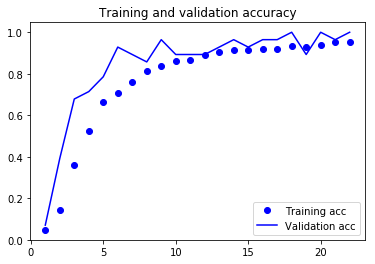

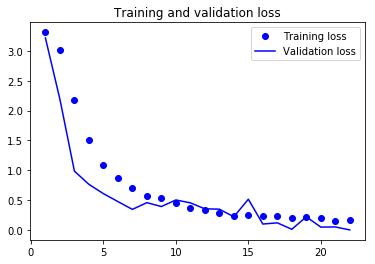

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
index=next(train_generator.index_generator)

In [17]:
image_batch,label_batch=train_generator._get_batches_of_transformed_samples(index)

In [18]:
image_name=train_generator.filenames[index]

TypeError: only integer scalar arrays can be converted to a scalar index

In [26]:
print(np.argmax(model.predict(image_batch)[2]))
print(np.argmax(label_batch[2]))



9
9


KeyboardInterrupt: 